# Example Parameter Matrix

This notebook produces the examplary MHN paramter matrix from fig. 1.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from utils import plotting

log_theta = np.array(
    [
        [0.5, 0, 0.5, 0],
        [-0.5, 0, 0, 0],
        [0, 0, -0.1, -0.2],
        [0, 0.1, 0, -1],
        [1, 0.5, 0, 0],
    ], dtype=float)

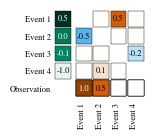

In [2]:
fig, ax = plt.subplots(figsize=(1.5, 1.4))

n_events = 4
border_len = 0.1
br_ir_sep = 0.2
events = [f"Event {i+1}" for i in range(n_events)]
linewidth = 0.3

max_br = np.diag(log_theta).max()
min_br = np.diag(log_theta).min()
_log_theta = log_theta.copy()
_log_theta[np.diag_indices(n_events)] = 0
m_ir = np.abs(_log_theta).max()

if events is None:
    events = np.arange(n_events).tolist()

if ax is None:
    _, ax = plt.subplots()


for i in range(n_events):
    for j in range(n_events):
        if i == j:
            ax.add_patch(mpl.patches.Rectangle(
                (0,
                    j + j * border_len),
                1, 1, linewidth=linewidth,
                edgecolor="black",
                facecolor=plotting.OI_Greens(
                    (log_theta[i, j] - min_br)/(max_br - min_br))
            ))
        else:
            ax.add_patch(mpl.patches.Rectangle(
                (j+1 + br_ir_sep + (j+1) * border_len,
                    i + i * border_len),
                1, 1, linewidth=linewidth,
                edgecolor="black",
                facecolor=plotting.OI_RdBu(
                    (log_theta[i, j]/m_ir + 1) / 2))
            )
    for j in range(n_events):
        ax.add_patch(mpl.patches.Rectangle(
            (j+1 + br_ir_sep + (j+1) * border_len,
                n_events + n_events * border_len),
            1, 1, linewidth=linewidth,
            edgecolor="black",
            facecolor=plotting.OI_RdBu(
                (log_theta[-1, j]/m_ir + 1) / 2),
        )
        )

for i in range(n_events):
    for j in range(n_events):
        if i != j:
            if log_theta[i, j] == 0:
                continue
            ax.text(
                (j+1 + br_ir_sep + (j+1) * border_len)
                + 0.5,
                i + i * border_len + 0.5,
                f"{log_theta[i, j]:.1f}",
                ha="center", va="center",
                fontsize=6,
                color="white" if abs(log_theta[i, j]) > m_ir / 2 else "black"
            )
        else:
            ax.text(
                0 + 0.5,
                j + j * border_len + 0.5,
                f"{log_theta[i, j]:.1f}",
                ha="center", va="center",
                fontsize=6,
                color="white"
                if abs(log_theta[i, j] - min_br) > (max_br - min_br) / 2
                else "black"
            )
for j in range(n_events):
    if log_theta[-1, j] == 0:
        continue
    ax.text(
        (j+1 + br_ir_sep + (j+1) * border_len)
        + 0.5,
        n_events + n_events * border_len + 0.5,
        f"{log_theta[-1, j]:.1f}",
        ha="center", va="center",
        fontsize=6,
        color="white" if abs(log_theta[-1, j]) > m_ir / 2 else "black",
    )

ax.set_xlim(0 - border_len, (border_len + 1) * (n_events + 1) + br_ir_sep)
ax.set_ylim((n_events + 1) * (border_len + 1) + border_len, 0 - border_len)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_xticks(
    [0.5] + (np.arange(
        1.5,
        n_events + 1 + n_events * border_len,
        1 + border_len) + br_ir_sep).tolist())
ax.set_yticks(np.arange(0.5, n_events + 1 +
                        n_events * border_len, 1 + border_len))
ax.set_xticklabels([""] + events, rotation=90)
ax.set_yticklabels(events + ["Observation"])
ax.tick_params(length=0, pad=2)
ax.set_aspect("equal")
fig.tight_layout()

fig.savefig("../results/figs/param_matrix.pdf")